# Résumé
Résumé du projet en 20 lignes maximum

# Création du Dataset

## import Libraries


In [ ]:
import pandas as pd
import numpy as np

import datetime as dt
import glob

import seaborn as sns
from matplotlib import pyplot as plt

#import folium
#from ipyleaflet import Map, Marker
#from folium.plugins import FastMarkerCluster

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


## Dataframe 1
#### Bulletins d’Analyse des Accidents Corporels de la circulation 2012-2018

In [ ]:
#df1 = pd.read_csv('/Users/alihachani/Desktop/Rennes/Rennescsv.csv', sep=';')
df1 = pd.read_csv('accidentologie_rennes.csv', sep=';')
df1.head(3)

,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,catu_7,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules
0,"48.19525996380506,-1.624960025462693","{""coordinates"": [[-1.624960025462693, 48.19525...",v_accident_corporel_2012_2018.2,2,1111,Gendarmerie Nationale 0015627 00336,2012-01-20T00:00:00+01:00,08:00,5,vendredi,...,NaN,0,NaN,0,1,0,2012,1,1,2
1,"48.08103442275426,-1.637577412394238","{""coordinates"": [[-1.637577412394238, 48.08103...",v_accident_corporel_2012_2018.9,9,1300,Sécurité publique 0035238 00489,2012-10-09T00:00:00+02:00,09:30,2,mardi,...,NaN,0,NaN,0,0,2,2012,2,2,1
2,"48.093370042964544,-1.608149999857022","{""coordinates"": [[-1.608149999857022, 48.09337...",v_accident_corporel_2012_2018.22,22,1351,Sécurité publique 0035238 00325,2012-07-01T00:00:00+02:00,18:18,7,dimanche,...,NaN,0,NaN,0,0,1,2012,1,1,2


In [ ]:
# Keeping only relative variables for my model

#df1 = df1[['Geo Point','accident','date', 'heure', 'c_jsem', 'jsem', 'nom_com', 'c_inter', 'inter', 'c-cadmin', 'c-cadmin', 'c-cadmin_2', 'c-cadmin_2', 'c-cadmin_3', 'c-cadmin_3', 'c-cadmin_4', 'c-cadmin_4', 'c-cadmin_5', 'c-cadmin_5', 'c-cadmin_6', 'c-cadmin_6', 'somme_victimes','somme_blesses', 'nb_vehicules','catu']]
#df1 = df1[['Geo Point','accident','date', 'heure', 'c_jsem', 'jsem', 'nom_com', 'c_inter', 'inter', 'c-cadmin', 'c-cadmin_2', 'c-cadmin_3', 'c-cadmin_4', 'c-cadmin_5', 'c-cadmin_6', 'somme_victimes','somme_blesses', 'nb_vehicules','catu']]
df1 = df1[['Geo Point','accident','nom_com', 'inter', 'somme_victimes','somme_blesses', 'nb_vehicules','catu']]

#df1 = df1[['Geo Point','accident','date','nom_com', 'inter', 'somme_victimes','somme_blesses', 'nb_vehicules','catu']]

df1.head(3)
df1.shape
df1.columns

Index(['Geo Point', 'accident', 'nom_com', 'inter', 'somme_victimes',
       'somme_blesses', 'nb_vehicules', 'catu'],
      dtype='object')

In [ ]:
df1.describe()

,accident,somme_victimes,somme_blesses,nb_vehicules
count,3726.000000,3726.000000,3726.000000,3726.000000
mean,1950.682501,1.249329,1.230811,1.740472
std,1121.646880,0.647011,0.656103,0.705879
min,1.000000,1.000000,0.000000,1.000000
25%,978.250000,1.000000,1.000000,1.000000
50%,1974.500000,1.000000,1.000000,2.000000
75%,2907.750000,1.000000,1.000000,2.000000
max,3887.000000,9.000000,9.000000,6.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geo Point       3726 non-null   object
 1   accident        3726 non-null   int64 
 2   date            3726 non-null   object
 3   nom_com         3726 non-null   object
 4   inter           3713 non-null   object
 5   somme_victimes  3726 non-null   int64 
 6   somme_blesses   3726 non-null   int64 
 7   nb_vehicules    3726 non-null   int64 
 8   catu            3726 non-null   object
dtypes: int64(4), object(5)
memory usage: 262.1+ KB


In [ ]:
# Rename a couple of columns

df1 = df1.rename({'somme_victimes':'Total_Victims',
                  'somme_blesses':'Total_Injured','nom_com':'Commune','catu':'Catégorie_Usager','inter':'Accident_Place'}, axis=1)
df1.head(3)

,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager
0,"48.19525996380506,-1.624960025462693",1111,2012-01-20T00:00:00+01:00,Betton,hors intersection,1,1,2,conducteur
1,"48.08103442275426,-1.637577412394238",1300,2012-10-09T00:00:00+02:00,Chantepie,giratoire,2,2,1,conducteur
2,"48.093370042964544,-1.608149999857022",1351,2012-07-01T00:00:00+02:00,Chantepie,en T,1,1,2,conducteur


In [ ]:
df1.shape

(3726, 9)

## DataFrame 2
### Historique de la  meteo de la ville de Rennes 2012-2018



In [ ]:
# get data file names

path ='/Users/alihachani/Desktop/Rennes/meteo/'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    print(f'loading {filename}')
    dfs.append(pd.read_csv(filename, skiprows=3, header=0))

# Concatenate all data into one DataFrame
df_meteo = pd.concat(dfs, ignore_index=True, sort=True)

loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2018.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2017.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2016.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2014.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2015.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2012.csv
loading /Users/alihachani/Desktop/Rennes/meteo/export-rennes2013.csv


In [ ]:
df_meteo.head(5)

,CLOUDCOVER_AVG_PERCENT,DATE,DEWPOINT_MAX_C,HEATINDEX_MAX_C,HUMIDITY_MAX_PERCENT,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION,PRECIP_TOTAL_DAY_MM,PRESSURE_MAX_MB,...,TEMPERATURE_NIGHT_C,TEMPERATURE_NOON_C,TOTAL_SNOW_MM,UV_INDEX,VISIBILITY_AVG_KM,WEATHER_CODE_EVENING,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WINDSPEED_MAX_KMH,WINDTEMP_MAX_C
0,44.250,2018-01-01,7,11,84,11,7,météo défavorable,10.6,1016,...,7,11,0.0,3,9.375,113,122,302,47,5
1,79.750,2018-01-02,12,13,96,13,5,météo défavorable,1.4,1018,...,5,11,0.0,4,7.875,122,143,122,23,3
2,87.500,2018-01-03,12,14,78,14,9,météo défavorable,5.7,1014,...,13,11,0.0,3,9.500,122,119,119,35,5
3,90.750,2018-01-04,12,15,88,15,10,météo défavorable,6.0,1008,...,15,14,0.0,3,8.000,263,296,122,40,10
4,55.625,2018-01-05,10,11,87,11,6,météo défavorable,1.4,1003,...,10,10,0.0,2,9.250,116,263,116,23,6


In [ ]:
df_meteo.columns

Index(['CLOUDCOVER_AVG_PERCENT', 'DATE', 'DEWPOINT_MAX_C', 'HEATINDEX_MAX_C',
       'HUMIDITY_MAX_PERCENT', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C',
       'OPINION', 'PRECIP_TOTAL_DAY_MM', 'PRESSURE_MAX_MB', 'SUNHOUR',
       'SUNRISE', 'SUNSET', 'TEMPERATURE_EVENING_C', 'TEMPERATURE_MORNING_C',
       'TEMPERATURE_NIGHT_C', 'TEMPERATURE_NOON_C', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'VISIBILITY_AVG_KM', 'WEATHER_CODE_EVENING',
       'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'WINDSPEED_MAX_KMH',
       'WINDTEMP_MAX_C'],
      dtype='object')

In [ ]:
df_meteo = df_meteo.rename({'OPINION':'Meteo', 'DATE':'date'}, axis=1)


In [ ]:
# Create an average column for the temperature
df_meteo['Average_temperature_C'] = df_meteo[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C']].mean(axis=1)


In [ ]:
# Keeping only the necessary columns

df_meteo = df_meteo[['date', 'Average_temperature_C', 'Meteo', 'WINDSPEED_MAX_KMH', 'CLOUDCOVER_AVG_PERCENT']]

In [ ]:
df_meteo

,date,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT
0,2018-01-01,9.0,météo défavorable,47,44.250
1,2018-01-02,9.0,météo défavorable,23,79.750
2,2018-01-03,11.5,météo défavorable,35,87.500
3,2018-01-04,12.5,météo défavorable,40,90.750
4,2018-01-05,8.5,météo défavorable,23,55.625
...,...,...,...,...,...
2552,2013-12-27,10.0,météo très défavorable,35,93.875
2553,2013-12-28,6.0,météo très défavorable,23,45.250
2554,2013-12-29,5.5,météo très défavorable,12,17.750
2555,2013-12-30,8.0,météo défavorable,34,76.750


## Join both datasets

In [ ]:
# Formating df1 Date column

df1['date'] = pd.to_datetime(df1.date, format='%Y-%m-%d',utc=True)
df1['date'] = pd.DatetimeIndex(df1.date).normalize()




In [ ]:
# Formating df_meteo Date column

df_meteo['date'] = pd.to_datetime(df_meteo.date, format='%Y-%m-%d',utc=True)
df_meteo['date'] = pd.DatetimeIndex(df_meteo.date).normalize()


In [ ]:
df = pd.merge(df1, df_meteo, how='inner', on='date')
df

,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT
0,"48.1315856457731,-1.640915323888561",56,2015-11-25 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,11.0,météo défavorable,28,99.500
1,"48.08653903528399,-1.666548375464717",89,2015-11-25 00:00:00+00:00,Rennes,hors intersection,1,1,2,conducteur,11.0,météo défavorable,28,99.500
2,"48.13966002405042,-1.695309945462175",1653,2015-11-25 00:00:00+00:00,Saint-Grégoire,hors intersection,1,1,1,conducteur,11.0,météo défavorable,28,99.500
3,"48.12855192405773,-1.664144834907739",83,2015-08-05 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,18.5,météo correcte,28,14.500
4,"48.086980010628885,-1.707399941273076",1807,2015-08-05 00:00:00+00:00,Saint-Jacques-de-la-Lande,giratoire,1,1,1,piéton,18.5,météo correcte,28,14.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,"48.125154584923244,-1.667519901497249",3029,2017-09-26 00:00:00+00:00,Rennes,hors intersection,1,1,1,conducteur,15.5,météo correcte,7,55.875
3722,"48.109858376660334,-1.679173925689499",3043,2017-10-10 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,14.5,météo défavorable,13,74.375
3723,"48.12127489841136,-1.602816290283487",3044,2017-10-11 00:00:00+00:00,Cesson-Sévigné,hors intersection,1,1,1,conducteur,14.0,météo défavorable,17,66.250
3724,"48.108566621477074,-1.692968036734784",3103,2017-11-21 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,11.5,météo défavorable,20,66.750


In [ ]:
df.Commune.unique()

array(['Rennes', 'Saint-Grégoire', 'Betton', 'Chantepie', 'Other',
       'Saint-Jacques-de-la-Lande', 'Noyal-Châtillon-sur-Seiche',
       'Laillé', 'Vezin-le-Coquet', 'Cesson-Sévigné', 'Pacé', 'Bruz',
       'Vern-sur-Seiche', 'le Rheu'], dtype=object)

##  Cleaning and features engineering

In [ ]:
# Changer la colonne date en year, month, day of the week

df['Weekday'] = df['date'].dt.day_name()
df['Month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# set the index
df = df.sort_values(by='date',ascending=True)
# set the index
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3726 entries, 3371 to 887
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Geo Point               3726 non-null   object             
 1   accident                3726 non-null   int64              
 2   date                    3726 non-null   datetime64[ns, UTC]
 3   Commune                 3726 non-null   object             
 4   Accident_Place          3726 non-null   object             
 5   Total_Victims           3726 non-null   int64              
 6   Total_Injured           3726 non-null   int64              
 7   nb_vehicules            3726 non-null   int64              
 8   Catégorie_Usager        3726 non-null   object             
 9   Average_temperature_C   3726 non-null   float64            
 10  Meteo                   3726 non-null   object             
 11  WINDSPEED_MAX_KMH       3726 non-null   i

,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,Weekday,Month,year,Season,latitude,longitude
3371,"48.08835279372575,-1.672142065011678",2534,2012-01-02 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,7.0,météo défavorable,23,26.500,Monday,January,2012,Winter,48.08835279372575,-1.672142065011678
2071,"48.1051948800813,-1.702010192099989",2319,2012-01-03 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.1051948800813,-1.702010192099989
2070,"48.10373923200602,-1.699672610666818",2309,2012-01-03 00:00:00+00:00,Rennes,giratoire,1,1,2,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.10373923200602,-1.699672610666818
1335,"48.10569685289206,-1.673972678799794",2530,2012-01-04 00:00:00+00:00,Rennes,en X,1,1,1,piéton,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.10569685289206,-1.673972678799794
1334,"48.09728681672044,-1.657790612801945",2568,2012-01-04 00:00:00+00:00,Rennes,à plus de 4 branches,1,1,2,conducteur,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.09728681672044,-1.657790612801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,"48.13191914036725,-1.635491622647381",3722,2018-12-25 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,6.5,météo défavorable,13,41.375,Tuesday,December,2018,Winter,48.13191914036725,-1.635491622647381
3596,"48.04345188060043,-1.684832495493772",3350,2018-12-27 00:00:00+00:00,Other,autre,2,2,2,conducteur,5.0,météo très défavorable,7,24.875,Thursday,December,2018,Winter,48.04345188060043,-1.684832495493772
897,"48.105121386528864,-1.650465680395038",3723,2018-12-29 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,6.0,météo très défavorable,7,64.000,Saturday,December,2018,Winter,48.105121386528864,-1.650465680395038
896,"48.010427394218695,-1.691869752268039",3842,2018-12-29 00:00:00+00:00,Other,hors intersection,2,2,2,conducteur,6.0,météo très défavorable,7,64.000,Saturday,December,2018,Winter,48.010427394218695,-1.691869752268039


In [ ]:
# Create seasons column

season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring',
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
df['Season'] = df['Month'].apply(lambda x: season_dict[x])

In [ ]:
df.columns

Index(['Geo Point', 'accident', 'date', 'Commune', 'Accident_Place',
       'Total_Victims', 'Total_Injured', 'nb_vehicules', 'Catégorie_Usager',
       'Average_temperature_C', 'Meteo', 'WINDSPEED_MAX_KMH',
       'CLOUDCOVER_AVG_PERCENT', 'Weekday', 'Month', 'year', 'Season',
       'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Ordering categorical data related to date

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=cats, ordered=True)

cat = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December']
df['Month'] = pd.Categorical(df['Month'], categories=cat, ordered=True)

categ = ['Winter', 'Spring', 'Summer', 'Fall' ]
df['Season'] = pd.Categorical(df['Season'], categories=categ, ordered=True)


In [ ]:
df.isnull().sum()
df["Accident_Place"].fillna("Not mentioned", inplace = True)

In [ ]:
df.columns


Index(['Geo Point', 'accident', 'date', 'Commune', 'Accident_Place',
       'Total_Victims', 'Total_Injured', 'nb_vehicules', 'Catégorie_Usager',
       'Average_temperature_C', 'Meteo', 'WINDSPEED_MAX_KMH',
       'CLOUDCOVER_AVG_PERCENT', 'Weekday', 'Month', 'year', 'Season',
       'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Creation d'une fontion pour reduire la 'cardinalité' de la colonne Commune

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

# transformer les colonnes
country_map = shorten_categories(df.Commune.value_counts(), 17)
df['Commune'] = df['Commune'].map(country_map)
df.Commune.value_counts()

Rennes                        2587
Saint-Grégoire                 254
Cesson-Sévigné                 241
Saint-Jacques-de-la-Lande      173
Other                          145
Chantepie                       99
Noyal-Châtillon-sur-Seiche      57
Betton                          34
Laillé                          28
Pacé                            27
Bruz                            22
Vern-sur-Seiche                 20
le Rheu                         20
Vezin-le-Coquet                 19
Name: Commune, dtype: int64

In [ ]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['Geo Point']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

## Exploratory Data Analysis EDA

### Distribution des variables numeriques dans le dataset

array([[<AxesSubplot:title={'center':'accident'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'Total_Victims'}>],
       [<AxesSubplot:title={'center':'Total_Injured'}>,
        <AxesSubplot:title={'center':'nb_vehicules'}>,
        <AxesSubplot:title={'center':'Average_temperature_C'}>],
       [<AxesSubplot:title={'center':'WINDSPEED_MAX_KMH'}>,
        <AxesSubplot:title={'center':'CLOUDCOVER_AVG_PERCENT'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

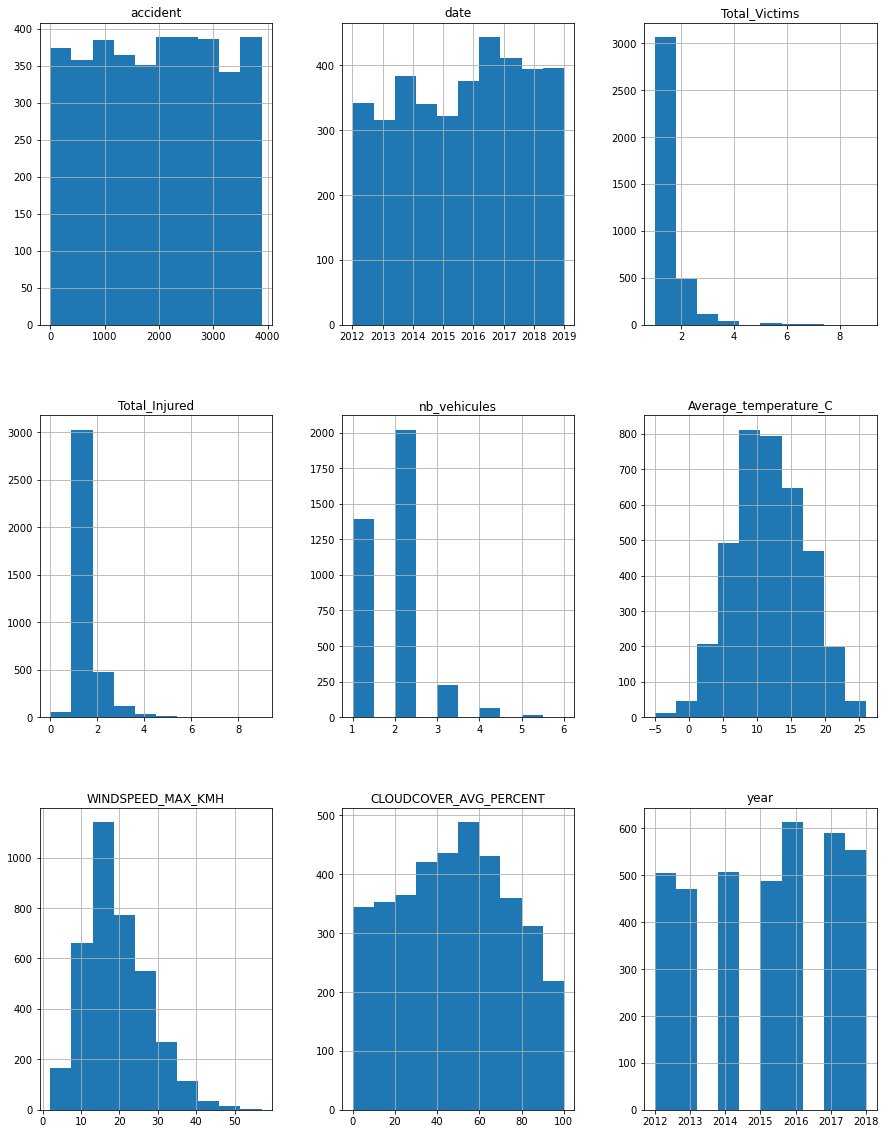

In [ ]:
## Plotting distribution numerical values

df.hist(figsize=(15,20))

### Plotter les outliers a l'aide d'un boxplot

<AxesSubplot:>

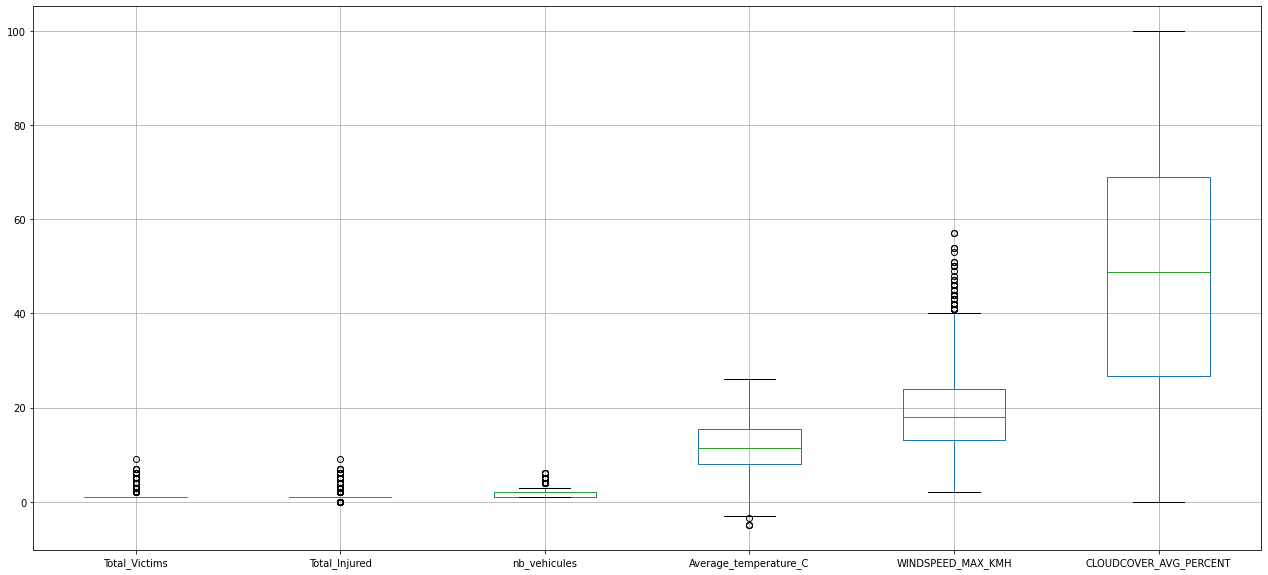

In [ ]:
# Boxplot to check outliers

df[['Commune', 'Accident_Place',
       'Total_Victims', 'Total_Injured', 'nb_vehicules', 'Catégorie_Usager',
       'Average_temperature_C', 'Meteo', 'WINDSPEED_MAX_KMH',
       'CLOUDCOVER_AVG_PERCENT', 'Weekday', 'Month', 'Season']].boxplot(figsize=(22,10))

### Plotting Categorical features

In [ ]:
#days and months order
Day_order  = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#### Plotting accidents

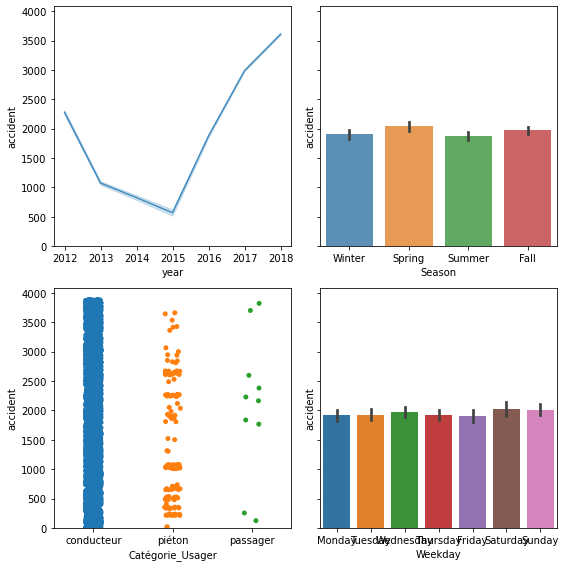

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8, 8),sharey=True)

sns.lineplot(data=df, x="year", y="accident", alpha=.8, ax=axs[0,0])
sns.barplot(data=df, x="Season", y="accident",alpha=.8, ax=axs[0,1])
sns.stripplot(data=df, x="Catégorie_Usager", y="accident",  ax=axs[1,0])
sns.barplot(data=df, x="Weekday", y="accident", ax=axs[1,1])



fig.tight_layout()


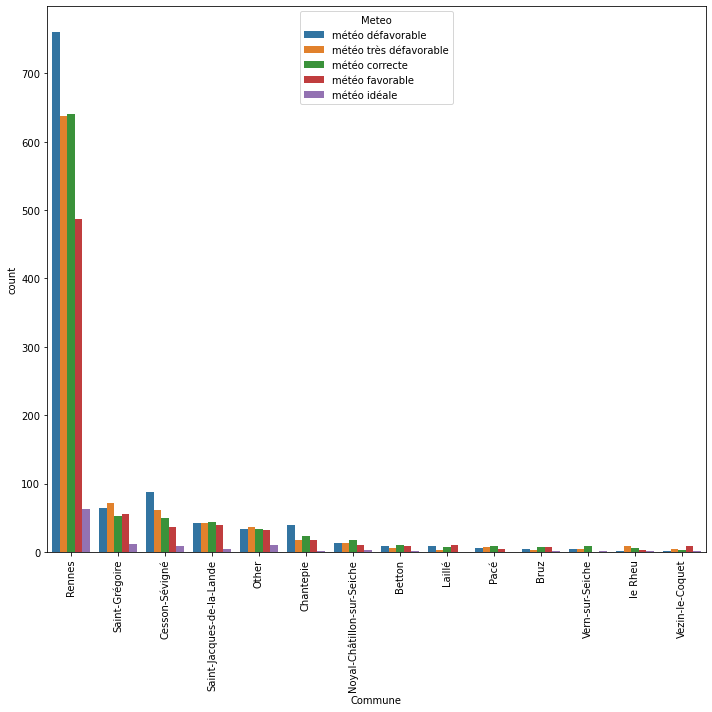

In [ ]:
df.Commune.value_counts()
des_ordering_commune = ['Rennes','Saint-Grégoire','Cesson-Sévigné' ,'Saint-Jacques-de-la-Lande'   ,'Other' ,'Chantepie' ,'Noyal-Châtillon-sur-Seiche' ,
                        'Betton' ,'Laillé','Pacé','Bruz','Vern-sur-Seiche','le Rheu','Vezin-le-Coquet']


fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(data=df, x="Commune", order=des_ordering_commune, ax=ax, hue='Meteo')

plt.xticks(rotation=90)

fig.tight_layout()


In [ ]:
df.Accident_Place.value_counts()

where_the_accid = [ 'en X', 'en T','giratoire',  'à plus de 4 branches', 'autre',
                   'en Y','Not mentioned', 'place','passage à niveau','hors intersection ' ]


#### Plotting injured poeple

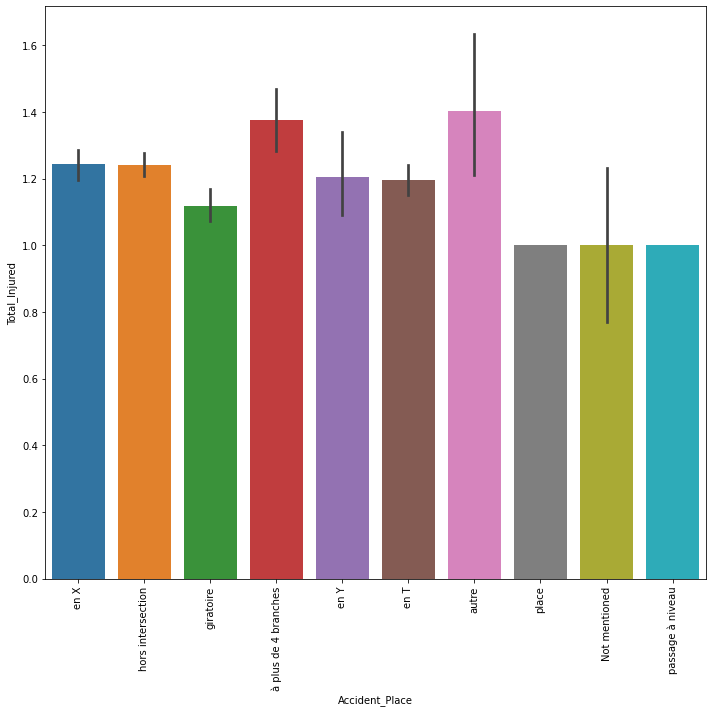

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x="Accident_Place",y = 'Total_Injured' , ax=ax)

plt.xticks(rotation=90)

fig.tight_layout()

### Relational plots

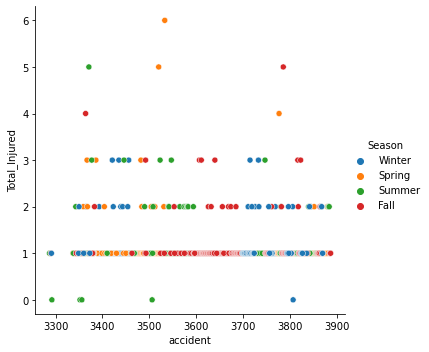

In [ ]:
df2018 = df[df['year'] == 2018]
df2018

sns.relplot(x ="accident", y ="Total_Injured", data = df2018, hue='Season')


### Showing accidents in a map

In [ ]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['Geo Point']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon



In [ ]:
df.drop('Geo Point', axis=1)

,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,Weekday,Month,year,Season,latitude,longitude
3371,2534,2012-01-02 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,7.0,météo défavorable,23,26.500,Monday,January,2012,Winter,48.08835279372575,-1.672142065011678
2071,2319,2012-01-03 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.1051948800813,-1.702010192099989
2070,2309,2012-01-03 00:00:00+00:00,Rennes,giratoire,1,1,2,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.10373923200602,-1.699672610666818
1335,2530,2012-01-04 00:00:00+00:00,Rennes,en X,1,1,1,piéton,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.10569685289206,-1.673972678799794
1334,2568,2012-01-04 00:00:00+00:00,Rennes,à plus de 4 branches,1,1,2,conducteur,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.09728681672044,-1.657790612801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,3722,2018-12-25 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,6.5,météo défavorable,13,41.375,Tuesday,December,2018,Winter,48.13191914036725,-1.635491622647381
3596,3350,2018-12-27 00:00:00+00:00,Other,autre,2,2,2,conducteur,5.0,météo très défavorable,7,24.875,Thursday,December,2018,Winter,48.04345188060043,-1.684832495493772
897,3723,2018-12-29 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,6.0,météo très défavorable,7,64.000,Saturday,December,2018,Winter,48.105121386528864,-1.650465680395038
896,3842,2018-12-29 00:00:00+00:00,Other,hors intersection,2,2,2,conducteur,6.0,météo très défavorable,7,64.000,Saturday,December,2018,Winter,48.010427394218695,-1.691869752268039


In [ ]:
lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location = [48.117266, -1.6777926], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Correlation plotting


/var/folders/tm/ym72fqh16_7by4fpzh7vcv_80000gn/T/ipykernel_37952/2226018453.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

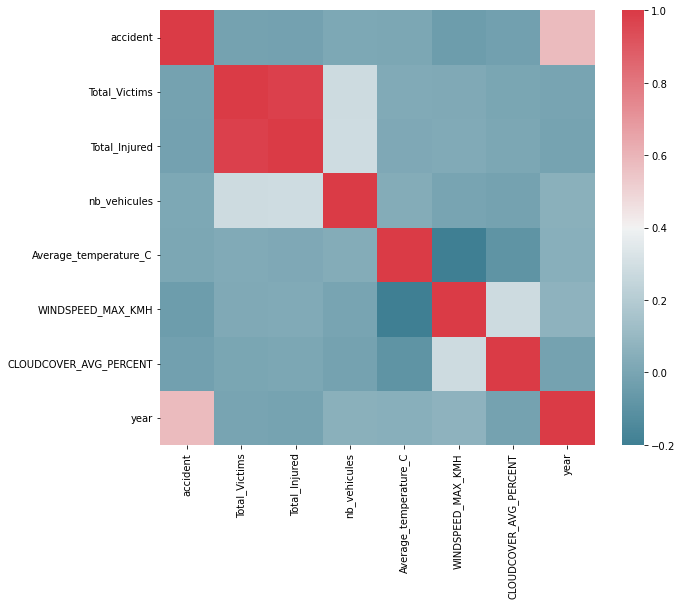

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Deployement of the machinne learning models

### Clusteriing région rennaise

In [ ]:
df.head(2)
# supprimer des cols

df_cluster = df.drop(['latitude','longitude', 'Geo Point'], axis=1)
df_cluster = pd.get_dummies(df_cluster)
df_cluster.head(2)




,accident,date,Total_Victims,Total_Injured,nb_vehicules,Average_temperature_C,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,year,Commune_Betton,...,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December,Season_Winter,Season_Spring,Season_Summer,Season_Fall
3371,2534,2012-01-02 00:00:00+00:00,1,1,2,7.0,23,26.50,2012,0,...,0,0,0,0,0,0,1,0,0,0
2071,2319,2012-01-03 00:00:00+00:00,2,2,1,10.0,40,86.25,2012,0,...,0,0,0,0,0,0,1,0,0,0


## Prediction du nombre d'accident en rennes centre

### df_rennes Preprocessing

In [ ]:
# Keeping only data pour Rennes centre
df_rennes = df[df['Commune'] == 'Rennes']
df_rennes = df_rennes.reset_index(drop=True)
# Deleting some variables to not over fit the model

"""df_rennes = df_rennes.drop(['Geo Point', 'Commune', 'latitude', 'longitude',
                            'WINDSPEED_MAX_KMH','year'], axis=1)"""


df_rennes.head()

,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,Weekday,Month,year,Season,latitude,longitude
0,"48.08835279372575,-1.672142065011678",2534,2012-01-02 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,7.0,météo défavorable,23,26.500,Monday,January,2012,Winter,48.08835279372575,-1.672142065011678
1,"48.1051948800813,-1.702010192099989",2319,2012-01-03 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.1051948800813,-1.702010192099989
2,"48.10373923200602,-1.699672610666818",2309,2012-01-03 00:00:00+00:00,Rennes,giratoire,1,1,2,conducteur,10.0,météo défavorable,40,86.250,Tuesday,January,2012,Winter,48.10373923200602,-1.699672610666818
3,"48.10569685289206,-1.673972678799794",2530,2012-01-04 00:00:00+00:00,Rennes,en X,1,1,1,piéton,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.10569685289206,-1.673972678799794
4,"48.09728681672044,-1.657790612801945",2568,2012-01-04 00:00:00+00:00,Rennes,à plus de 4 branches,1,1,2,conducteur,7.5,météo très défavorable,24,42.875,Wednesday,January,2012,Winter,48.09728681672044,-1.657790612801945


In [ ]:
df_rennes['Average_temperature_C'] = df_rennes['Average_temperature_C'].astype(int)
df_rennes.head(3)

,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,Weekday,Month,year,Season,latitude,longitude
0,"48.08835279372575,-1.672142065011678",2534,2012-01-02 00:00:00+00:00,Rennes,en X,1,1,2,conducteur,7,météo défavorable,23,26.50,Monday,January,2012,Winter,48.08835279372575,-1.672142065011678
1,"48.1051948800813,-1.702010192099989",2319,2012-01-03 00:00:00+00:00,Rennes,hors intersection,2,2,1,conducteur,10,météo défavorable,40,86.25,Tuesday,January,2012,Winter,48.1051948800813,-1.702010192099989
2,"48.10373923200602,-1.699672610666818",2309,2012-01-03 00:00:00+00:00,Rennes,giratoire,1,1,2,conducteur,10,météo défavorable,40,86.25,Tuesday,January,2012,Winter,48.10373923200602,-1.699672610666818


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Create some toy data in a Pandas dataframe
fruit_data = pd.DataFrame({
    'fruit':  ['apple','orange','pear','orange'],
    'color':  ['red','orange','green','green'],
    'weight': [5,6,3,4]
})

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
df_rennes = MultiColumnLabelEncoder(columns = ['Accident_Place'	,'Catégorie_Usager', 'Meteo','Weekday','Month','Season']).fit_transform(df_rennes)
df_rennes


,Geo Point,accident,date,Commune,Accident_Place,Total_Victims,Total_Injured,nb_vehicules,Catégorie_Usager,Average_temperature_C,Meteo,WINDSPEED_MAX_KMH,CLOUDCOVER_AVG_PERCENT,Weekday,Month,year,Season,latitude,longitude
0,"48.08835279372575,-1.672142065011678",2534,2012-01-02 00:00:00+00:00,Rennes,3,1,1,2,0,7,1,23,26.500,1,4,2012,3,48.08835279372575,-1.672142065011678
1,"48.1051948800813,-1.702010192099989",2319,2012-01-03 00:00:00+00:00,Rennes,6,2,2,1,0,10,1,40,86.250,5,4,2012,3,48.1051948800813,-1.702010192099989
2,"48.10373923200602,-1.699672610666818",2309,2012-01-03 00:00:00+00:00,Rennes,5,1,1,2,0,10,1,40,86.250,5,4,2012,3,48.10373923200602,-1.699672610666818
3,"48.10569685289206,-1.673972678799794",2530,2012-01-04 00:00:00+00:00,Rennes,3,1,1,1,2,7,4,24,42.875,6,4,2012,3,48.10569685289206,-1.673972678799794
4,"48.09728681672044,-1.657790612801945",2568,2012-01-04 00:00:00+00:00,Rennes,8,1,1,2,0,7,4,24,42.875,6,4,2012,3,48.09728681672044,-1.657790612801945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,"48.10985148116491,-1.679106006335124",3720,2018-12-22 00:00:00+00:00,Rennes,6,1,1,2,0,11,0,19,61.750,2,2,2018,3,48.10985148116491,-1.679106006335124
2583,"48.108665720184156,-1.705086345736388",3721,2018-12-24 00:00:00+00:00,Rennes,6,1,1,2,0,11,1,12,68.500,1,2,2018,3,48.108665720184156,-1.705086345736388
2584,"48.13191914036725,-1.635491622647381",3722,2018-12-25 00:00:00+00:00,Rennes,3,1,1,2,0,6,1,13,41.375,5,2,2018,3,48.13191914036725,-1.635491622647381
2585,"48.105121386528864,-1.650465680395038",3723,2018-12-29 00:00:00+00:00,Rennes,3,1,1,2,0,6,4,7,64.000,2,2,2018,3,48.105121386528864,-1.650465680395038


In [ ]:
df_rennes.describe()
df_rennes.columns


Index(['Geo Point', 'accident', 'date', 'Commune', 'Accident_Place',
       'Total_Victims', 'Total_Injured', 'nb_vehicules', 'Catégorie_Usager',
       'Average_temperature_C', 'Meteo', 'WINDSPEED_MAX_KMH',
       'CLOUDCOVER_AVG_PERCENT', 'Weekday', 'Month', 'year', 'Season',
       'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Split data into features and target
y=df_rennes["accident"]

rennes_features=['Accident_Place','nb_vehicules', 'Average_temperature_C', 'Meteo',
       'Weekday', 'Month', 'Season','CLOUDCOVER_AVG_PERCENT','Total_Victims','Catégorie_Usager', 'WINDSPEED_MAX_KMH']
X = df_rennes[rennes_features]




X.describe()

,Accident_Place,nb_vehicules,Average_temperature_C,Meteo,Weekday,Month,Season,CLOUDCOVER_AVG_PERCENT,Total_Victims,Catégorie_Usager,WINDSPEED_MAX_KMH
count,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000
mean,4.591032,1.724005,11.394666,1.728257,3.257441,5.823348,1.435253,48.470719,1.208349,0.110939,19.119057
std,1.915996,0.675771,5.191613,1.489842,1.989001,3.422903,1.156358,26.442742,0.560597,0.454912,8.206380
min,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,3.000000,1.000000,8.000000,1.000000,1.000000,3.000000,0.000000,27.000000,1.000000,0.000000,13.000000
50%,5.000000,2.000000,11.000000,1.000000,4.000000,6.000000,1.000000,49.000000,1.000000,0.000000,18.000000
75%,6.000000,2.000000,15.000000,3.000000,5.000000,9.000000,3.000000,69.125000,1.000000,0.000000,24.000000
max,8.000000,6.000000,26.000000,4.000000,6.000000,11.000000,3.000000,100.000000,6.000000,2.000000,57.000000


# Standardize data

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<AxesSubplot:>

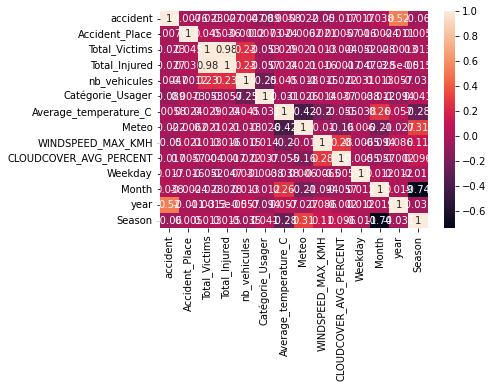

In [ ]:
# Feature importance

relation = df_rennes.corr()
relation_index = relation.index
sns.heatmap(df_rennes[relation_index].corr(), annot=True)

In [ ]:
y

0       2534
1       2319
2       2309
3       2530
4       2568
        ... 
2582    3720
2583    3721
2584    3722
2585    3723
2586    3724
Name: accident, Length: 2587, dtype: int64

In [ ]:
# Split data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor


###Linear Regression
DecisionTreeRegressortree = DecisionTreeRegressor()
DecisionTreeRegressortree.fit(X_train, y_train.values.ravel())
DecisionTreeRegressortree_y_pred = DecisionTreeRegressortree.predict(X_test)

###Ridge
KNeighborsRegressor = KNeighborsRegressor(n_neighbors=5)
KNeighborsRegressor.fit(X_train, y_train.values.ravel())
KNeighborsRegressor_y_pred = KNeighborsRegressor.predict(X_test)


###DecisionTreeRegressortree

RandomForestRegressor = RandomForestRegressor(n_estimators = 10,random_state=42)
RandomForestRegressor.fit(X_train, y_train.values.ravel())
RandomForestRegressor_y_pred = RandomForestRegressor.predict(X_test)



from sklearn.cluster import KMeans

lin = LinearRegression()
lin.fit(X_train, y_train.values.ravel())
lin_y_pred = lin.predict(X_test)
#Native bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
gnb_y_pred = gnb.predict(X_test)



In [ ]:


# on affiche le résultat du modèle

print('-------------DecisionTreeRegressortree-----------')

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('DecisionTreeRegressortree Model Performance')
    print('Average Error: {:0.4f} accidents.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

DecisionTreeRegressortree.fit(X, y.values.ravel())
base_accuracy = evaluate(DecisionTreeRegressortree, X, y.values.ravel())


print('-------------RandomForestRegressor-----------')

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('RandomForestRegressor Model Performance')
    print('Average Error: {:0.4f} accidents.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

KNeighborsRegressor.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(KNeighborsRegressor, X, y.values.ravel())


print('-------------Linear regression-----------')


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Linear regression Model Performance')
    print('Average Error: {:0.4f} accidents.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

RandomForestRegressor.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(RandomForestRegressor, X, y.values.ravel())


print('-------------Linear naive base-----------')




def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Linear naive base Model Performance')
    print('Average Error: {:0.4f} accidents.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

gnb.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(gnb, X, y.values.ravel())

-------------DecisionTreeRegressortree-----------
DecisionTreeRegressortree Model Performance
Average Error: 3.0651 accidents.
Accuracy = 98.85%.
-------------RandomForestRegressor-----------
RandomForestRegressor Model Performance
Average Error: 787.1257 accidents.
Accuracy = -253.99%.
-------------Linear regression-----------
Linear regression Model Performance
Average Error: 473.4168 accidents.
Accuracy = -124.88%.
-------------Linear naive base-----------
Linear naive base Model Performance
Average Error: 195.0209 accidents.
Accuracy = -48.06%.


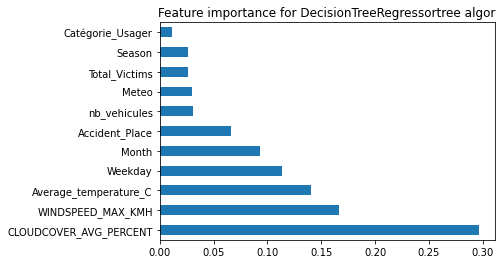

In [ ]:
feat_importances = pd.Series(DecisionTreeRegressortree.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature importance for DecisionTreeRegressortree algor')
plt.show()


In [ ]:
# Fit the model on training set

DecisionTreeRegressortree = DecisionTreeRegressor()
model = DecisionTreeRegressortree.fit(X, y.values)

DecisionTreeRegressortree_y_pred = DecisionTreeRegressortree.predict(X)
error = np.sqrt(mean_squared_error(y,DecisionTreeRegressortree_y_pred))
print(error)

gnb = GaussianNB()
gnb.fit(X, y.values)

gnb_y_pred = gnb.predict(X)
error1 = np.mean(mean_squared_error(y,gnb_y_pred))
print(error1)


19.65212861244626
776.0610746037881


In [ ]:
data = {"model":model, "le_accident_place":le, "le_Catégorie_Usager":le,"la_Meteo":le, "le_Weekday":le, "le_month":le, "la_Season":le}
with open('final_model.pkl', 'wb') as file :
    pickle.dump(data, file)

NameError: name 'le' is not defined

In [ ]:
with open('final_model.pkl', 'rb') as file :
    data = pickle.load(file)

DecisionTreeRegressortree_loaded = data["model"]
